In [1]:
import numpy as np
import time as tim
import matplotlib.pyplot as plt

In [2]:
class Euler_method:
    def __init__(self, A1, A2, k1, k2, g, u, x0):
        # Parámetros del sistema
        self.A1 = A1
        self.A2 = A2
        self.k1 = k1
        self.k2 = k2
        self.u = u
        self.g = g
        self.x0 = x0
    
    def integrate(self, tfin = 100, h = 1e-2):
        N = np.int64(np.ceil((tfin-h)/h))
        t = h + np.arange(0,N)*h
        
        # Condiciones iniciales
        Y_NL = np.empty((N, 2))
        Y_NL[0] = self.x0[0], self.x0[1]
        
        y = np.empty(N)
        
        A = 0
        for k in range(N-1):
            # Vector no lineal
            F = np.array([self.u/self.A1 - (self.k1/self.A1)*np.sqrt(self.g*Y_NL[k,0]), 
                         (self.k1/self.A2)*np.sqrt(self.g*Y_NL[k,0]) - (self.k2/self.A2)*np.sqrt(self.g*Y_NL[k,1])])
            
            Y_NL[k+1] = Y_NL[k] + ( np.dot(A, Y_NL[k]) + F )*h
            
            y[k+1] = self.k2*np.sqrt(self.g*Y_NL[k,1])
            
        return t, Y_NL

--- 0.4283487796783447 seconds ---


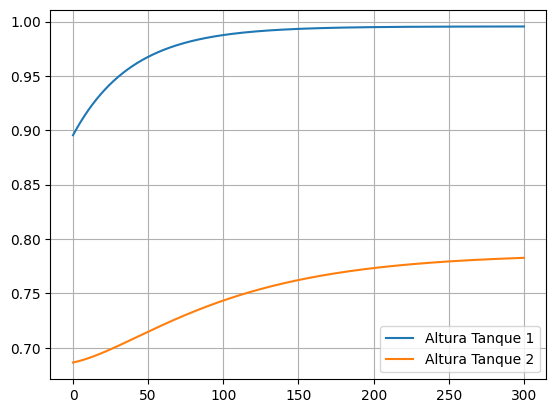

In [11]:
# Parámetros de simulacion
h = 1e-2
tfin = 300

# Parámetros del modelo
A1 = 0.2 # [m²] (Sección del tanque 1)
A2 = 0.5 # [m²] (Sección del tanque 2)
k1 = 0.0032 # [m³/s / m1/2]. (Coeficiente de pérdida 1)
k2 = 0.0036 # [m³/s / m1/2]. (Coeficiente de pérdida 2)
g = 9.81 # Aceleración de gravedad
u = 0.01  # [m³/s]. (Caudal de entrada)
    
# Condiciones iniciales
ptr = -0.1 # Pequenia perturbacion
h1_eq = (u**2)/(g*k1**2)
h2_eq = (u**2)/(g*k2**2) # puntos eq.
x0 = h1_eq + ptr, h2_eq + ptr

# Método de Euler con enfoque matricial
start_time = tim.time()
euler = Euler_method(A1, A2, k1, k2, g, u, x0)
t, Y = euler.integrate(tfin, h)
    
print("--- %s seconds ---" % (tim.time() - start_time))
    
plt.figure
plt.plot(t, Y[:,0], label = 'Altura Tanque 1')
plt.plot(t, Y[:,1], label = 'Altura Tanque 2')
plt.legend()
plt.grid()
plt.show()


In [4]:
def Euler_integrate_L(A1, A2, k1, k2, g, u, x0, tfin = 100, h = 1e-2):
    N = np.int64(np.ceil((tfin-h)/h))
    t = h + np.arange(0,N)*h
    
    # Condiciones iniciales
    Y_L = np.empty((N, 2))
    Y_L[0] = x0[0], x0[1]
    
    h1_eq = (u**2)/(g*k1**2)
    h2_eq = (u**2)/(g*k2**2)

    a11 = -k1*np.sqrt(g*h1_eq)/(2*A1*h1_eq)
    a12 = 0
    a21 = k1*np.sqrt(g*h1_eq)/(2*A2*h1_eq)
    a22 = -k2*np.sqrt(g*h2_eq)/(2*A2*h2_eq)

    A = np.array([[a11, a12],
                  [a21, a22]])

    B = np.array([1/A1,
                  0])
    
    for k in range(N-1):
        # Vector no lineal

        Y_L[k+1] = Y_L[k] + ( np.dot(A,Y_L[k]) + B*u )*h
        
    return t, Y_L

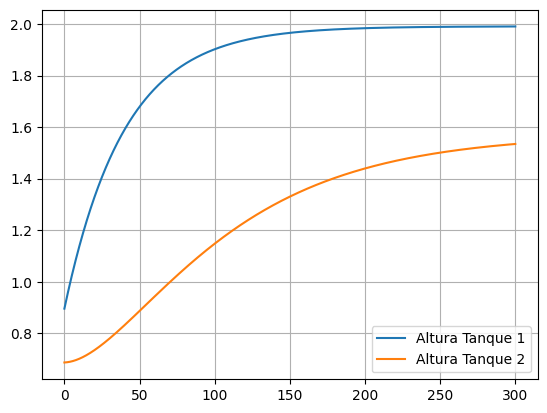

In [5]:
t, YL = Euler_integrate_L(A1, A2, k1, k2, g, u, x0, tfin, h)

plt.figure
plt.plot(t, YL[:,0], label = 'Altura Tanque 1')
plt.plot(t, YL[:,1], label = 'Altura Tanque 2')
plt.legend()
plt.grid()
plt.show()